In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from mlptools.io.read import read_from_n2p2_data

path2target = path2target = "/home/y1u0d2/result/n2p2/Si/95/cut_3.77"
mlpatoms = read_from_n2p2_data(path2target)

0 / 55069
1000 / 55069
2000 / 55069
3000 / 55069
4000 / 55069
5000 / 55069
6000 / 55069
7000 / 55069
8000 / 55069
9000 / 55069
10000 / 55069
11000 / 55069
12000 / 55069
13000 / 55069
14000 / 55069
15000 / 55069
16000 / 55069
17000 / 55069
18000 / 55069
19000 / 55069
20000 / 55069
21000 / 55069
22000 / 55069
23000 / 55069
24000 / 55069
25000 / 55069
26000 / 55069
27000 / 55069
28000 / 55069
29000 / 55069
30000 / 55069
31000 / 55069
32000 / 55069
33000 / 55069
34000 / 55069
35000 / 55069
36000 / 55069
37000 / 55069
38000 / 55069
39000 / 55069
40000 / 55069
41000 / 55069
42000 / 55069
43000 / 55069
44000 / 55069
45000 / 55069
46000 / 55069
47000 / 55069
48000 / 55069
49000 / 55069
50000 / 55069
51000 / 55069
52000 / 55069
53000 / 55069
54000 / 55069
55000 / 55069


In [14]:
# plot energy
energy_df = pd.DataFrame([[atom.get_atomic_energy(), atom.get_atomic_volume(), atom.structure_id] for atom in mlpatoms],
    columns=['energy', 'volume', 'structure_id'])

In [16]:
blacklist = ['mp-three', 'mp-four', 'mp-149_dimer', 'mp-slab']
energy_df = energy_df[~energy_df['structure_id'].isin(blacklist)]

<Axes: xlabel='volume', ylabel='energy'>

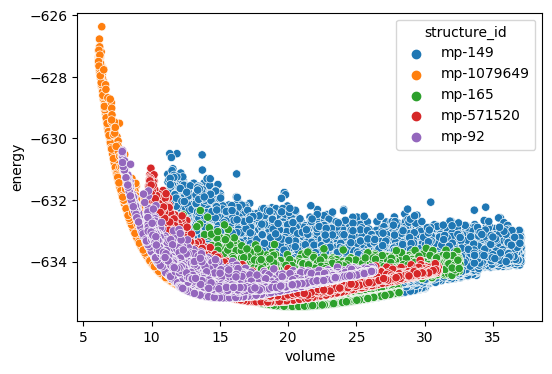

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=energy_df, x='volume', y='energy', hue='structure_id')

In [34]:
dimers = [atom for atom in mlpatoms if atom.n_atoms == 2]

In [38]:
dimer_energy = [[dimer.get_atomic_distance(), dimer.get_atomic_energy()] for dimer in dimers]
dimer_energy_df = pd.DataFrame(dimer_energy, columns=['distance', 'energy'])
dimer_energy_df.sort_values(by='distance', inplace=True)
dimer_energy_df.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Si dimer')

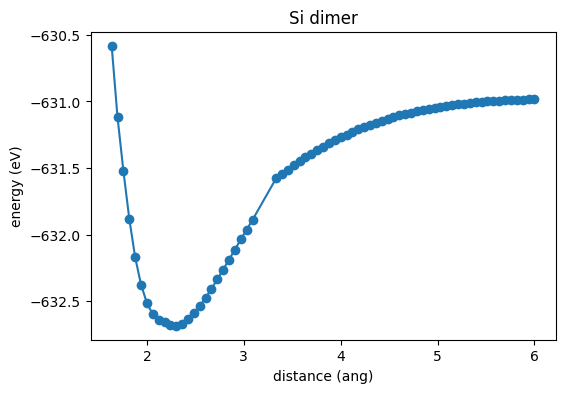

In [40]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(dimer_energy_df['distance'], dimer_energy_df['energy'], marker='o')
ax.set_xlabel('distance (ang)')
ax.set_ylabel('energy (eV)')
ax.set_title('Si dimer')

In [31]:
# plot force
force_df = []
for atom in mlpatoms:
    tmp_df = pd.DataFrame(atom.force, columns=['fx', 'fy', 'fz'])
    tmp_df['structure_id'] = atom.structure_id
    force_df.append(tmp_df)

force_df = pd.concat(force_df, ignore_index=True)

<Axes: xlabel='fx', ylabel='fy'>

/home/y1u0d2/anaconda3/envs/deepmd/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/y1u0d2/anaconda3/envs/deepmd/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


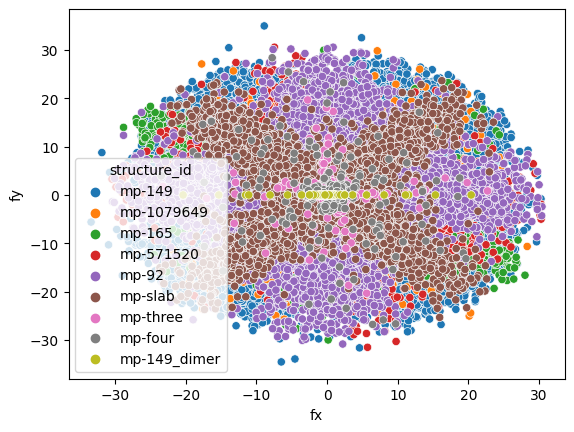

In [33]:
sns.scatterplot(data=force_df, x='fx', y='fy', hue='structure_id')